In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
import pandas as pd


student_data = pd.read_csv('student_data_encoded.csv')
# Dropping the original 'age' column
student_data.drop('age', axis=1, inplace=True)

# Define the target variable and features
target = 'G3'
features = [col for col in student_data.columns if col != target]

# Splitting the dataset
X = student_data[features]
y = student_data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identifying categorical and numerical columns
categorical_features = student_data.select_dtypes(include=['object']).columns.tolist()
# Adding 'AgeGroup' to categorical features
#categorical_features.append('AgeGroup')  

numerical_features = student_data.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_features.remove(target)  # Removing the target variable from numerical features

# Creating transformers
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combining transformers into a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Applying the transformations
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [7]:

numerical_features

['Medu',
 'Fedu',
 'traveltime',
 'studytime',
 'failures',
 'famrel',
 'freetime',
 'goout',
 'Dalc',
 'Walc',
 'health',
 'absences',
 'G1',
 'G2',
 'TotalAlc',
 'StudytimeXFailures',
 'LogAbsences']

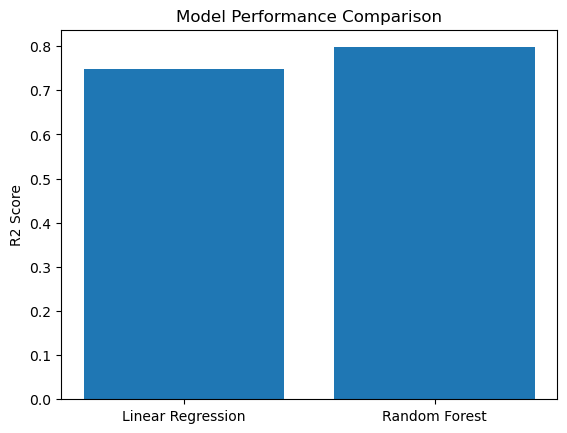

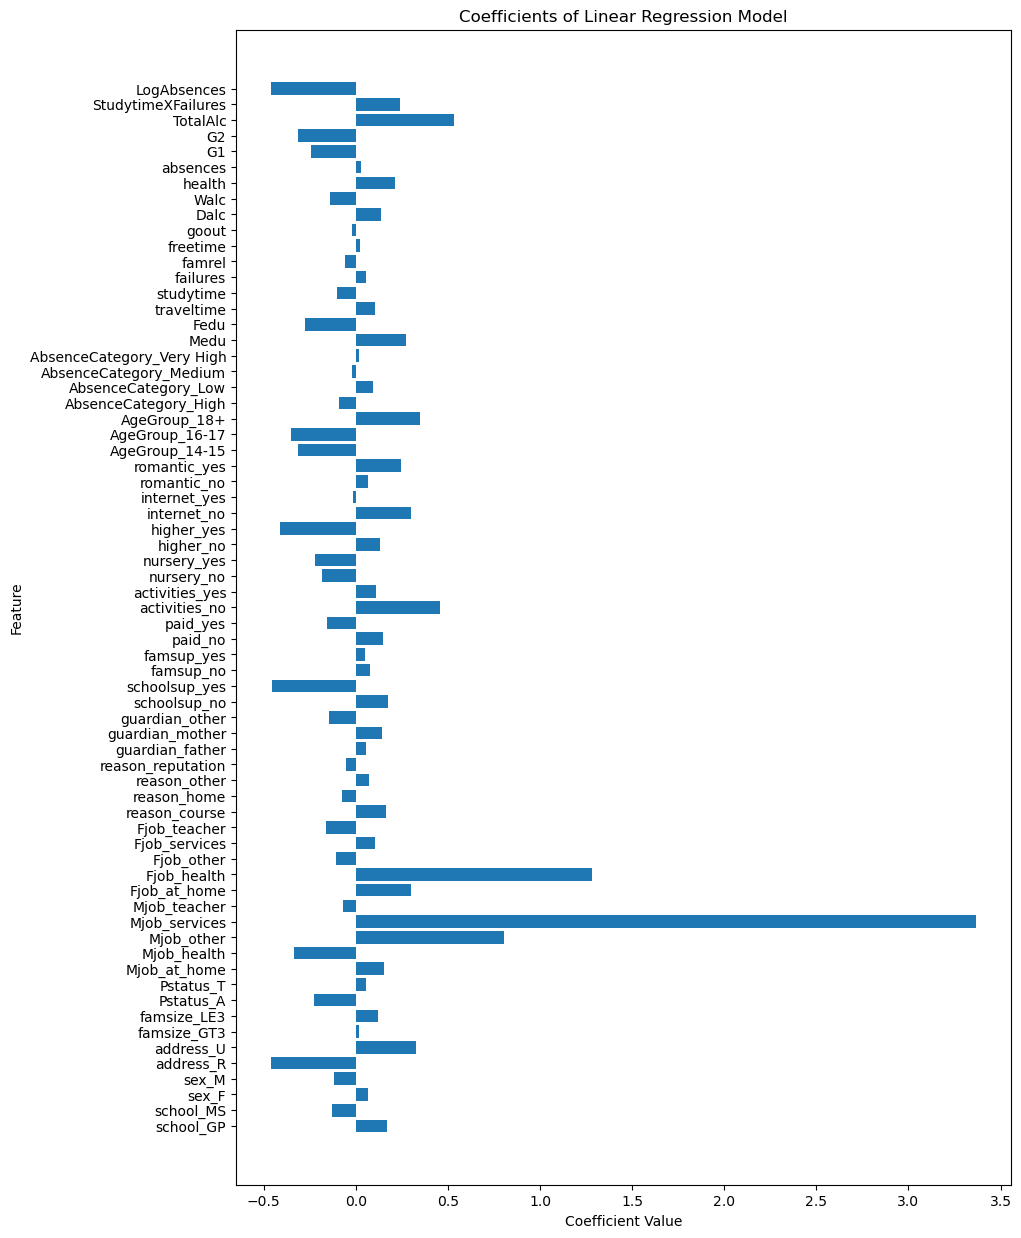

In [9]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# Step 2: Training the Models

# Linear Regression
lr = LinearRegression()
lr.fit(X_train_processed, y_train)

# Random Forest
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train_processed, y_train)

# Step 3: Evaluating the Models

# Predicting and calculating R2 scores
y_pred_lr = lr.predict(X_test_processed)
y_pred_rf = rf.predict(X_test_processed)

r2_lr = r2_score(y_test, y_pred_lr)
r2_rf = r2_score(y_test, y_pred_rf)

# Visualizing the scores
plt.bar(['Linear Regression', 'Random Forest'], [r2_lr, r2_rf])
plt.title('Model Performance Comparison')
plt.ylabel('R2 Score')
plt.show()

# Step 4: Visualizing Coefficients of Linear Regression

# Getting feature names after one-hot encoding
feature_names = list(preprocessor.named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_features))
feature_names += numerical_features

# Coefficients
coefficients = lr.coef_

# Visualizing the coefficients
plt.figure(figsize=(10, 15))
plt.barh(feature_names, coefficients)
plt.title('Coefficients of Linear Regression Model')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()

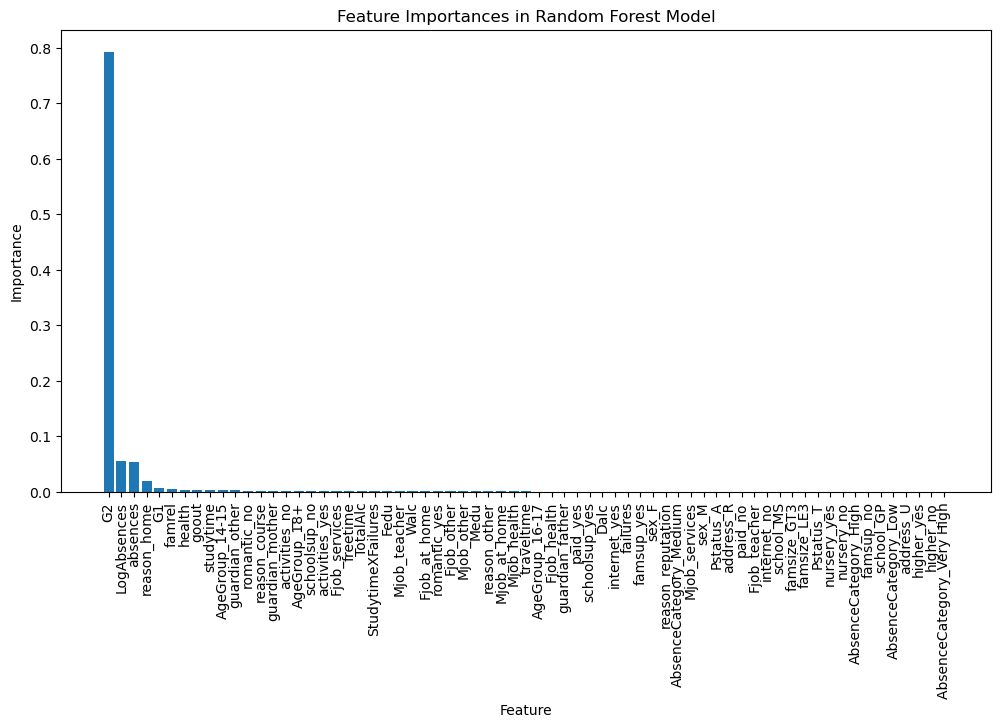

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# Assuming the Random Forest model (rf) and preprocessor have been fitted

# Feature names: combining original names for numerical features and one-hot encoded names for categorical
if hasattr(preprocessor.named_transformers_['cat'].named_steps['onehot'], 'get_feature_names_out'):
    # If 'get_feature_names_out' is available
    onehot_features = preprocessor.named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_features)
else:
    # Older versions of Scikit-learn
    onehot_features = preprocessor.named_transformers_['cat'].named_steps['onehot'].get_feature_names(categorical_features)

feature_names = np.concatenate([numerical_features, onehot_features])

# Feature Importances from Random Forest
rf_importances = rf.feature_importances_

# Sorting the feature importances
sorted_indices = np.argsort(rf_importances)[::-1]

# Creating the plot
plt.figure(figsize=(12, 6))
plt.title('Feature Importances in Random Forest Model')
plt.bar(range(len(sorted_indices)), rf_importances[sorted_indices], align='center')
plt.xticks(range(len(sorted_indices)), feature_names[sorted_indices], rotation=90)
plt.ylabel('Importance')
plt.xlabel('Feature')
plt.show()